# Snippets/Examples for practice
These snippets/examples are shared to save typing and allow maximum play/tweaking time.  The snippets and examples are in raw text cells and should be copied into code cells to be used.  If you convert the raw cells to code cells and work directly in them then you stand to lose the clean snippet / example.

### uncaptured open file command

In [ ]:
#copy and paste the example above here

In [ ]:
tweets=[]
with open("trumpTweets.json", "r") as f:
    for tweet in f:
        tweets.append(json.loads(tweet))
    print(len(tweets))
    print(tweets[1]["text"])

In [61]:
import json
inputFile=open("trumpTweets.json", "r")
line = json.loads(inputFile.readline())
print(json.dumps(line, indent = 4))

{
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id_str": null,
    "possibly_sensitive": false,
    "id": 725540988047876096,
    "user": {
        "time_zone": null,
        "default_profile_image": false,
        "is_translation_enabled": false,
        "protected": false,
        "lang": "en",
        "profile_banner_url": "https://pbs.twimg.com/profile_banners/224732878/1461363729",
        "default_profile": true,
        "id": 224732878,
        "profile_background_color": "C0DEED",
        "profile_text_color": "333333",
        "profile_use_background_image": true,
        "friends_count": 3670,
        "profile_sidebar_fill_color": "DDEEF6",
        "following": false,
        "profile_background_tile": false,
        "followers_count": 4673,
        "profile_link_color": "0084B4",
        "contributors_enabled": false,
        "has_extended_profile": false,
        "url": null,
        "profile_sidebar_border_color": "C0DEED",
        "utc_offset": null,
      

In [64]:
tweets = []
with open("trumpTweets.json", "r") as inputFile:
    for line in inputFile:
        tweets.append(json.loads(line))

[('#Trump', 70), ('#Trump2016', 13), ('amp', 13), ("It's", 11), ('https', 11), ('I', 10), ('#TrumpTrain', 10), ('http', 9), (':/', 8), ('Trump', 8)]


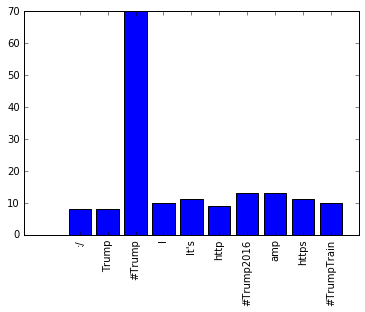

In [106]:
from collections import Counter
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

with open("trumpTweets.json", "r") as inputFile:
    count_all = Counter()
    for line in inputFile:
        tweet=json.loads(line)
        terms = [term for term in preprocess(tweet['text']) if term not in stop]
        count_all.update(terms)
    # Print the first 5 most frequent words
    print(count_all.most_common(10))

    %matplotlib inline
    count_all_dict = dict(count_all.most_common(10))
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(100, 40))
    plt.bar(range(len(count_all_dict)), count_all_dict.values(), align='center')
    plt.xticks(range(len(count_all_dict)), list(count_all_dict.keys()),rotation='vertical')

    plt.show()

In [76]:
#Count the terms
import operator 
import json
from collections import Counter
 
fname = 'tweets-0001.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        count_all.update(preprocess(tweet['text']))
    # Print the first 5 most frequent words
    print(count_all.most_common(5))

[(',', 26), (':', 24), ('we', 20), ('#DiverseDH', 18), ('!', 16)]


### Tokenization failure example

In [70]:
from nltk.tokenize import word_tokenize
 
fake_tweet = "RT @symulation: just an example I'd like to share! :D http://example.com #NLP #NLTK"
print(word_tokenize(fake_tweet))

['RT', '@', 'symulation', ':', 'just', 'an', 'example', 'I', "'d", 'like', 'to', 'share', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP', '#', 'NLTK']


### A pre-written text preprocessor from [this blog](https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/)

It is unlikely that you'll need to do anything with this preprocessor except copy it in-line with our code and/or run it whenever this notebook is opened.

In [68]:
#Instantiate a text pre-processor
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

['RT', '@', 'Campaign_Trump', ':', '#', 'Trump', 'billionaire', 'is', 'staying', 'at', 'Holiday', 'Express', '.', 'It', "'s", 'shows', 'you', 'he', 'is', 'just', 'a', 'nice', 'plain', 'no', 'BS', 'down', 'to', 'earth', 'guy', '.', 'http…']
['RT', '@Campaign_Trump', ':', '#Trump', 'billionaire', 'is', 'staying', 'at', 'Holiday', 'Express', '.', "It's", 'shows', 'you', 'he', 'is', 'just', 'a', 'nice', 'plain', 'no', 'BS', 'down', 'to', 'earth', 'guy', '.', 'http', '…']
[('.', 73), ('#Trump', 70), (':', 70), ('RT', 63), ('…', 45)]
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
<class 'dict'>
[('#Trump', 70), ('#Trump2016', 13), ('amp', 13), ("It's", 11), ('https', 11)]


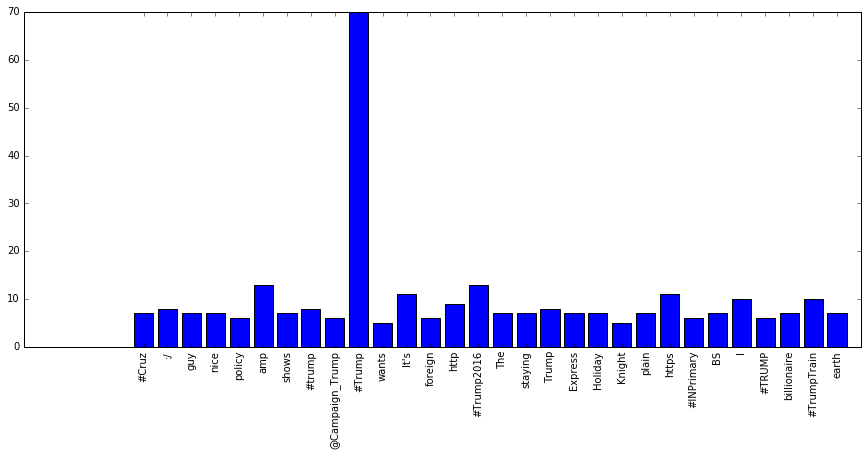

In [98]:
#Task Description: load a corpus of tweets and print a barplot of the most frequently used terms

#Open the file
inFile = open('trumpTweets.json')
#for line in inFile:
#    print(line)

#Load the data from the file into a variable
import json

line = inFile.readline() # read only the first tweet/line
tweet = json.loads(line) # load it as Python dict
# this print is nice for showing the content of a tweet
#print(json.dumps(tweet, indent=4)) # pretty-print

#Slice up the body text of the tweets
from nltk.tokenize import word_tokenize
 
#tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(tweet['text'])) # chops up the tweet.  this is done badly.

#Instantiate a text pre-processor
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
print(preprocess(tweet['text']))

#Count the terms
import operator 
import json
from collections import Counter
 
fname = 'trumpTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(5))

#This gives us mostly junk though so we need to remove stopwords.
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
print(punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        # Update the counter
        count_all.update(terms_stop)
    # Print the first 5 most frequent words
    print (type(dict(count_all)))
    print(count_all.most_common(5))   
    
"""
# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in preprocess(tweet['text']) 
    if term not in stop 
    and not term.startswith(('#', '@'))] 
    # mind the ((double brackets))
    # startswith() takes a tuple (not a list) if 
    # we pass a list of inputs
"""


#Produce the chart
# Print the current version of the chart
%matplotlib inline
count_all_dict = dict(count_all.most_common(30))
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.bar(range(len(count_all_dict)), count_all_dict.values(), align='center')
plt.xticks(range(len(count_all_dict)), list(count_all_dict.keys()),rotation='vertical')

plt.show()

#Close everything
inFile.close()